# Индивиуальное задание

## Этап  № 3. Исследование распределений и моментов, связанных с преобразованием случайных величин

_Выполнил_ студент 2 курса<br>
учебной группы НММ-02-22<br>
Мулин Иван

### Цели
1. Исследовать распределение созданных выборок.

### Задача

Радиус окружности R=10, размер выборки 1000 точек.

Сгенерировать выборку точек, равномерно распределенных внутри круга двумя способами:
+ Равномерно распределить точки внутри квадрата, внутрь которого вписана окружность, и отфильтровать точки, лежащие за пределами окружности.
+ Генерировать точки путем задания случайного угла и расстояния от центра окружности.

Для созданных выборок сделать следующее:
1. Создать рисунок, иллюстрирующий расположение точек сгенерированной выборки внутри окружности;
2. Найти выборочные средние координат точек и их дисперсию;
3. Построить график плотности распределения расстояния от случайной равномерно распределенной точки в круге до фиксированной точки, лежащей вне окружности (к примеру, с координатами X=20, Y=0).
4. Построить график плотности распределения расстояния между двумя случайными точками, равномерно расположенными внутри круга.

### Ход работы

Подключаем библиотеки `numpy` и `matplotlib`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

Matplotlib is building the font cache; this may take a moment.


In [2]:
Radius = 10
Amount = 200

insiders = np.empty((Amount, 2), dtype=float)

##### Декартовы координаты

In [3]:
x = y = 0
c = 0
while (c < Amount):
    x = np.random.uniform(-Radius, Radius)
    y = np.random.uniform(-Radius, Radius)
    if (x**2 + y**2 <= Radius**2):
        insiders[c] = [x, y]
        c += 1

In [4]:
angleDomain = np.linspace(0, 2*np.pi, 100)
circleX = Radius * np.cos(angleDomain)
circleY = Radius * np.sin(angleDomain)

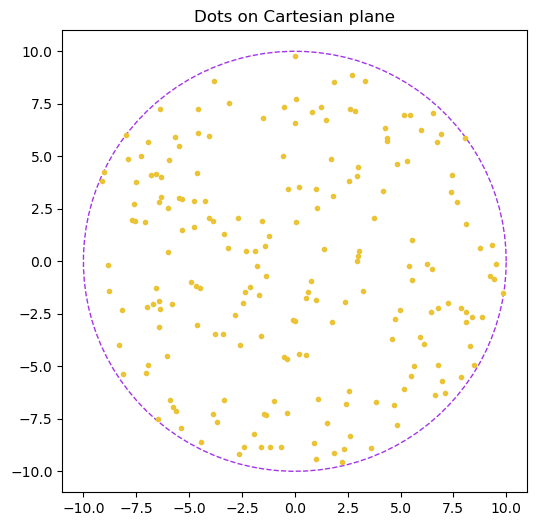

In [5]:
plt.figure(dpi=100, figsize=(6, 6))
plt.title("Dots on Cartesian plane")

plt.plot(circleX, circleY, linestyle="dashed", linewidth="1", color="#a434eb")
plt.plot(insiders[:, 0], insiders[:, 1], linestyle="none", marker=".", color="#ebc334")

plt.show()
print()

In [6]:
meanX, meanY = np.mean(insiders[:, 0]), np.mean(insiders[:, 1])
varX, varY = np.var(insiders[:, 0]), np.var(insiders[:, 1])

print("Mean: %.2f on X, %.2f on Y" % (meanX, meanY))
print("Variance: %.2f on X, %.2f on Y" % (varX, varY))

Mean: -0.06 on X, -0.38 on Y
Variance: 26.60 on X, 24.85 on Y


In [7]:
def metric(x1, y1, x2, y2):
    return ((x2-x1)**2 + (y2-y1)**2) ** 0.5

In [8]:
FX, FY = (20, 0)
FDistances = np.empty(Amount, dtype=float)

In [9]:
for l in range( len(insiders) ):
    FDistances[l] = metric(FX, FY, insiders[l][0], insiders[l][1])
FDistances.sort()

FDistancesY = gaussian_kde(FDistances).evaluate(FDistances)

FCentreDistance = metric(0, 0, FX, FY)
minDistance = FCentreDistance - Radius
maxDistance = FCentreDistance + Radius

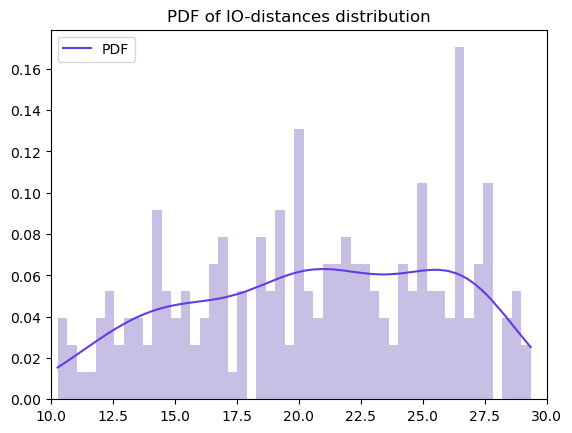

In [10]:
plt.figure(dpi=100)
plt.title("PDF of IO-distances distribution")
# IO-distances stands for Inside-Outside-distances meaning
# we measure distance between point inside the circle and a point outside the circle

plt.hist(FDistances, density=True, bins=50, color="#4a2ba6", alpha=0.3)
plt.plot(FDistances, FDistancesY, color="#653be3", label="PDF")

plt.xlim(minDistance, maxDistance)
plt.legend()
plt.show()
print()

In [11]:
distances = np.empty(int( Amount*(Amount-1)*0.5 ), dtype=float)

index = 0
# This is very slow if Amount >= 500.
for i in range(Amount-1):
    for j in range(i+1, Amount):
        # I could've done it through np.append but I don't care
        index = int( i*Amount - (i+1)*(i+2)*0.5 + j )
        distances[index] = metric(insiders[i][0], insiders[i][1], insiders[j][0], insiders[j][1])
distances.sort()

distancesY = gaussian_kde(distances).evaluate(distances)

*Объяснение*

Пусть $d_i^j$ — расстояние между $i$-ой и $j$-й ($0 \leq i,j\leq n-1$) точками из имеющейся выборки. Тогда к элементам $d_i^j$ в верхнем треугольнике верхнетреугольный матрицы
$$
\begin{pmatrix}
0 & d_0^1 & d_0^2 & \cdots & d_0^{n-1}\\
0 & 0 & d_1^2 & \cdots & d_1^{n-1}\\
\cdots & \cdots & \cdots & \cdots & \cdots\\
0 & 0 & 0 & \cdots & d_{n-2}^{n-1}\\
0 & 0 & 0 & \cdots & 0
\end{pmatrix}
$$
подберём единственный номер `index`. Занумеруем элементы слева направо сверху вниз. Очевидно, для $d_i^{i+1} (i=0,1,\cdots, n-2)$ — первого элемента над главной диагональю получится номер
$$ in-\frac{i(i-1)}{2}-i=in-\frac{i(i+1)}{2} $$
(Отсчитываем $i$ строк длиной $n$, затем вычёркиваем $1+2+\cdots+(i-1)=\frac{i(i-1)}{2}$ нулей, "засчитаных" при обходе этих $i$ строк, после этого продвигаемся по $(i+1)$ строке ещё на $i$ нулей.)

Поскольку $i+1 \leq j \leq n-1$, то $0 \leq j-(i+1) \leq n-1-(i+1)$ и индекс $j-(i+1)$ пробегает все элементы $(i+1)$-ой строки. Значит, искомый индекс равен
$$ in-\frac{i(i+1)}{2} + j-(i+1) = in-\frac{(i+1)(i+2)}{2}+j $$
В коде n=`Amount`, а значит,
``` python
index = int( i*Amount - (i+1)*(i+2)*0.5 + j )
```

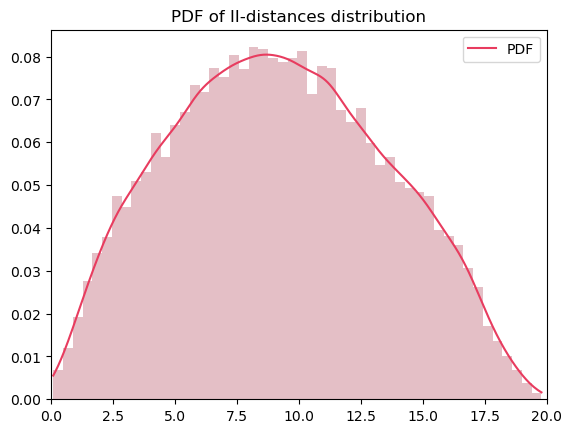

In [12]:
plt.figure(dpi=100)
plt.title("PDF of II-distances distribution")
# II-distances stands for Inside-Inside-distances meaning
# we measure distance between points inside the circle


plt.hist(distances, density=True, bins=50, color="#a62b44", alpha=0.3)
plt.plot(distances, distancesY, color="#e83c5f", label="PDF")

plt.xlim(0, 2 * Radius)
plt.legend()
plt.show()
print()

##### Полярные координаты

Задание в этом случае ничем не отличается от предыдущего, за одним исключением: получая полярный радиус в отрезке [0, Radius], мы *гарантируем* появление точек в созданной окружности.

In [13]:
PI2 = 2*np.pi

In [14]:
r = a = 0

for c in range(Amount):
    r = np.random.uniform(0, Radius)
    a = np.random.uniform(0, PI2)
    insiders[c] = [r*np.cos(a), r*np.sin(a)]

Дальнейшие действия полностью повторяют проведённую ранее работу без каких-либо технических изменений.

In [15]:
angleDomain = np.linspace(0, PI2, 100)
circleX = Radius * np.cos(angleDomain)
circleY = Radius * np.sin(angleDomain)

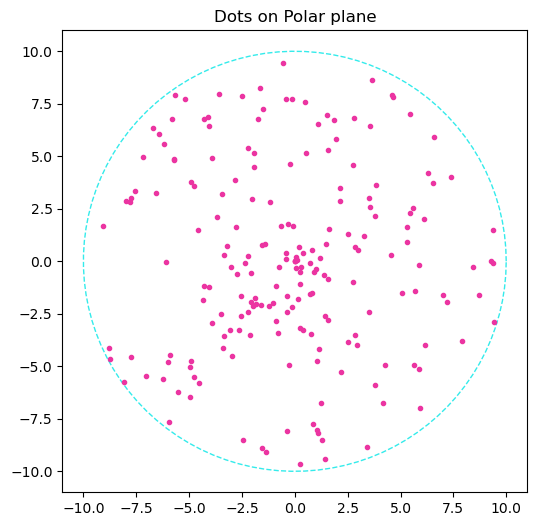

In [16]:
plt.figure(dpi=100, figsize=(6, 6))
plt.title("Dots on Polar plane")

plt.plot(circleX, circleY, linestyle="dashed", linewidth="1", color="#34ebeb")
plt.plot(insiders[:, 0], insiders[:, 1], linestyle="none", marker=".", color="#eb34a1")

plt.show()
print()

In [24]:
meanX, meanY = np.mean(insiders[:, 0]), np.mean(insiders[:, 1])
varX, varY = np.var(insiders[:, 0]), np.var(insiders[:, 1])

print("Mean: %.2f on X, %.2f on Y" % (meanX, meanY))
print("Variance: %.2f on X, %.2f on Y" % (varX, varY))

Mean: -0.27 on X, -0.01 on Y
Variance: 17.12 on X, 20.03 on Y


In [18]:
def metric(x1, y1, x2, y2):
    return ((x2-x1)**2 + (y2-y1)**2) ** 0.5

In [19]:
FX, FY = (20, 0)
FDistances = np.empty(Amount, dtype=float)

In [20]:
for l in range( len(insiders) ):
    FDistances[l] = metric(FX, FY, insiders[l][0], insiders[l][1])
FDistances.sort()

FDistancesY = gaussian_kde(FDistances).evaluate(FDistances)

FCentreDistance = metric(0, 0, FX, FY)
minDistance = FCentreDistance - Radius
maxDistance = FCentreDistance + Radius

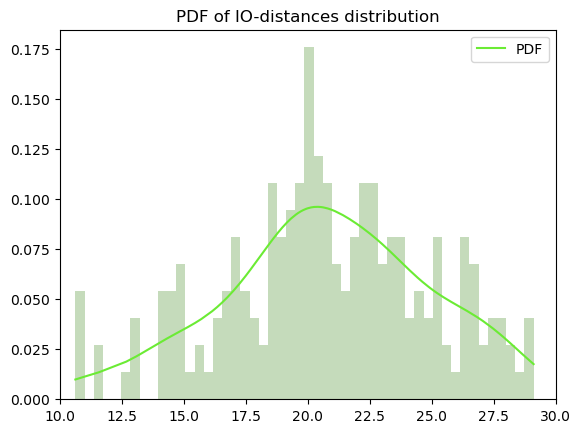

In [21]:
plt.figure(dpi=100)
plt.title("PDF of IO-distances distribution")
# IO-distances stands for Inside-Outside-distances meaning
# we measure distance between point inside the circle and a point outside the circle

plt.hist(FDistances, density=True, bins=50, color="#3f8a20", alpha=0.3)
plt.plot(FDistances, FDistancesY, color="#6beb34", label="PDF")

plt.xlim(minDistance, maxDistance)
plt.legend()
plt.show()
print()

In [22]:
distances = np.empty(int( Amount*(Amount-1)*0.5 ), dtype=float)

index = 0
# This is very slow if Amount >= 500.
for i in range(Amount-1):
    for j in range(i+1, Amount):
        # I could've done it through np.append but I don't care
        index = int( i*Amount - (i+1)*(i+2)*0.5 + j )
        distances[index] = metric(insiders[i][0], insiders[i][1], insiders[j][0], insiders[j][1])
distances.sort()

distancesY = gaussian_kde(distances).evaluate(distances)

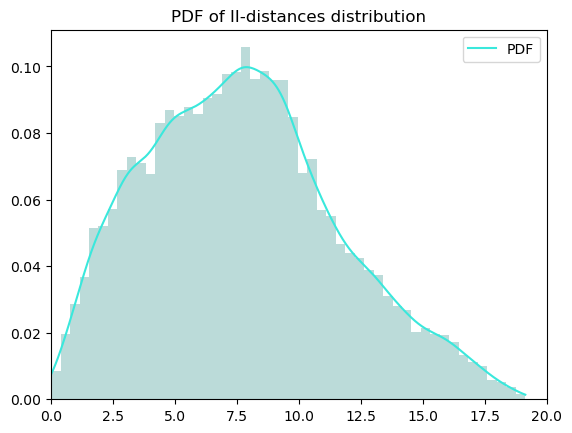

In [23]:
plt.figure(dpi=100)
plt.title("PDF of II-distances distribution")
# II-distances stands for Inside-Inside-distances meaning
# we measure distance between points inside the circle


plt.hist(distances, density=True, bins=50, color="#208a83", alpha=0.3)
plt.plot(distances, distancesY, color="#3ae8dc", label="PDF")

plt.xlim(0, 2 * Radius)
plt.legend()
plt.show()
print()

### Результаты

В ходе выполнения третьего этапа индивидуального задания была создана выборка точек, равномерно распределённых по кругу фиксированного радиуса. Задание положения точек через полярные координаты в условиях данной задачи оказалось более удобным. После этого были построены графики плотностей вероятностей для созданных пар.